One-hot Encoding:
    and  fun  idf  in  is  learning  love  nlp  powerful  technique  tf  used
0    1    1    0   0   1         0     0    1         1          0   0     0
1    0    0    0   0   0         1     1    1         0          0   0     0
2    0    0    1   1   1         0     0    1         0          1   1     1
TF-IDF Scores:
         and       fun       idf        in        is  learning      love  \
0  0.504611  0.504611  0.000000  0.000000  0.383770  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.652491  0.652491   
2  0.000000  0.000000  0.410747  0.410747  0.312384  0.000000  0.000000   

        nlp  powerful  technique        tf      used  
0  0.298032  0.504611   0.000000  0.000000  0.000000  
1  0.385372  0.000000   0.000000  0.000000  0.000000  
2  0.242594  0.000000   0.410747  0.410747  0.410747  


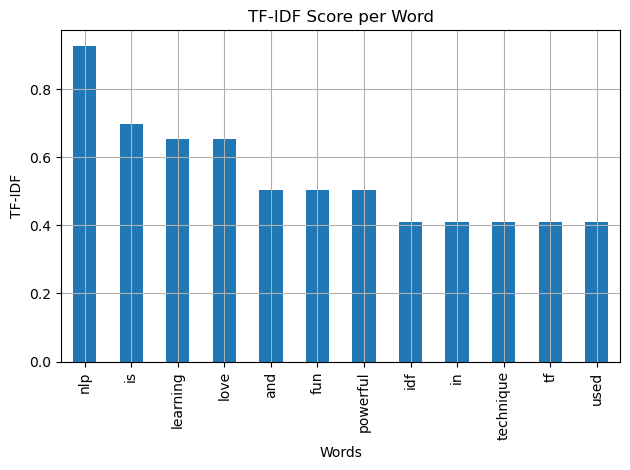

In [1]:
#ex1
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Sample text corpus
corpus = [
    "NLP is fun and powerful",
    "I love learning NLP",
    "TF-IDF is a technique used in NLP"
]

# One-hot encoding
vectorizer = CountVectorizer(binary=True)
one_hot = vectorizer.fit_transform(corpus).toarray()
one_hot_df = pd.DataFrame(one_hot, columns=vectorizer.get_feature_names_out())
print("One-hot Encoding:\n", one_hot_df)

# TF-IDF encoding
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
print("TF-IDF Scores:\n", tfidf_df)

# TF-IDF bar chart (sum over documents)
tfidf_sum = tfidf_df.sum().sort_values(ascending=False)
tfidf_sum.plot(kind='bar', title='TF-IDF Score per Word')
plt.ylabel("TF-IDF")
plt.xlabel("Words")
plt.grid(True)
plt.tight_layout()
plt.show()


CBOW - Similarity between 'nlp' and 'learning': 0.13459234
Skip-gram - Similarity between 'nlp' and 'learning': 0.13428447


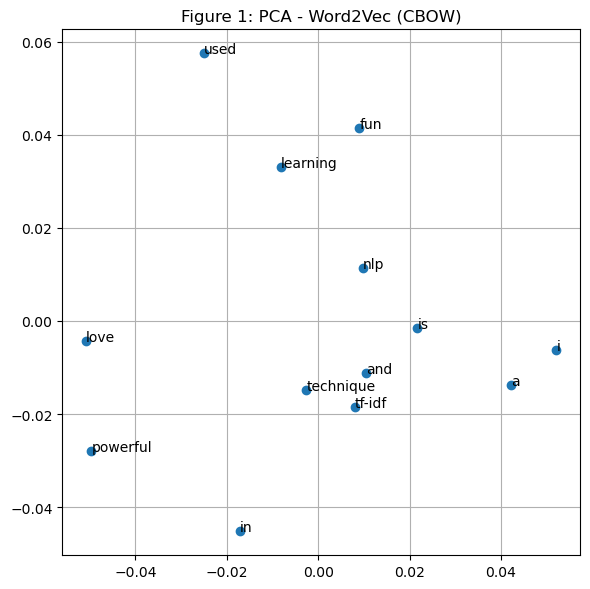

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


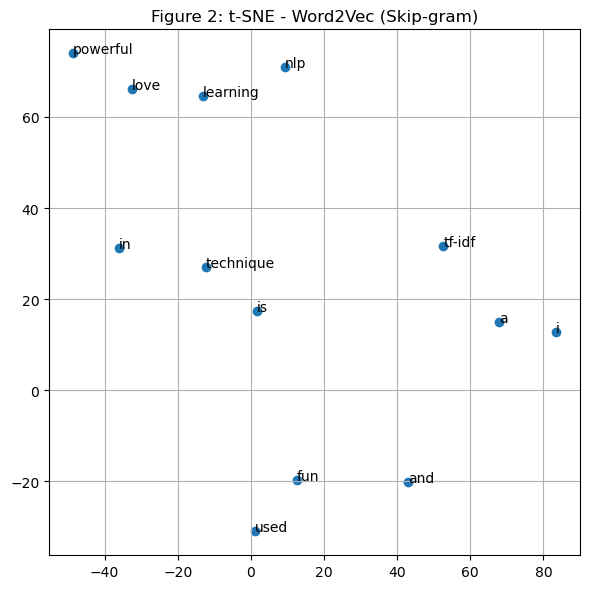

In [2]:
#ex2
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Sample tokenized corpus
tokenized = [
    ["nlp", "is", "fun", "and", "powerful"],
    ["i", "love", "learning", "nlp"],
    ["tf-idf", "is", "a", "technique", "used", "in", "nlp"]
]

# CBOW model (sg=0)
cbow_model = Word2Vec(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=0, epochs=100)

# Skip-gram model (sg=1)
skip_model = Word2Vec(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1, epochs=100)

# Compare similarity
print("CBOW - Similarity between 'nlp' and 'learning':", cbow_model.wv.similarity("nlp", "learning"))
print("Skip-gram - Similarity between 'nlp' and 'learning':", skip_model.wv.similarity("nlp", "learning"))

# PCA Visualization
def plot_pca(model, title):
    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    pca = PCA(n_components=2)
    components = pca.fit_transform(word_vectors)

    plt.figure(figsize=(6, 6))
    plt.scatter(components[:, 0], components[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(components[i, 0], components[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# t-SNE Visualization
def plot_tsne(model, title):
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, perplexity=3, n_iter=1000, random_state=0)
    reduced = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(6, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visualization
plot_pca(cbow_model, "Figure 1: PCA - Word2Vec (CBOW)")
plot_tsne(skip_model, "Figure 2: t-SNE - Word2Vec (Skip-gram)")


In [7]:
#ex3
# === GloVe Part ===
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = "C:/Users/ardak/OneDrive/Desktop/Study/NLP/Assignments/3-4/glove.6B.100d.txt"
word2vec_output_file = "C:/Users/ardak/OneDrive/Desktop/Study/NLP/Assignments/3-4/glove.6B.100d.word2vec.txt"

# Convert once
glove2word2vec(glove_input_file, word2vec_output_file)

# Load
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Test similarity
print("\nTop 5 similar words to 'learning' using GloVe:")
print(glove_model.most_similar("learning", topn=5))


# === FastText Part ===
from gensim.models import FastText

tokenized = [
    ["nlp", "is", "fun", "and", "powerful"],
    ["i", "love", "learning", "nlp"],
    ["tf-idf", "is", "a", "technique", "used", "in", "nlp"]
]

# Train FastText
fasttext_model = FastText(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1, epochs=100)

# Compare FastText similarities
print("\nTop 5 similar words to 'learning' using FastText:")
print(fasttext_model.wv.most_similar("learning", topn=5))


C:\Users\ardak\AppData\Local\Temp\ipykernel_22908\3405676191.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)



Top 5 similar words to 'learning' using GloVe:
[('teaching', 0.7720069289207458), ('knowledge', 0.76064133644104), ('experience', 0.7378624081611633), ('skills', 0.7343750596046448), ('learn', 0.7340658903121948)]

Top 5 similar words to 'learning' using FastText:
[('fun', 0.21179217100143433), ('powerful', 0.1826440691947937), ('and', 0.14515812695026398), ('is', 0.11612193286418915), ('technique', 0.08439049124717712)]


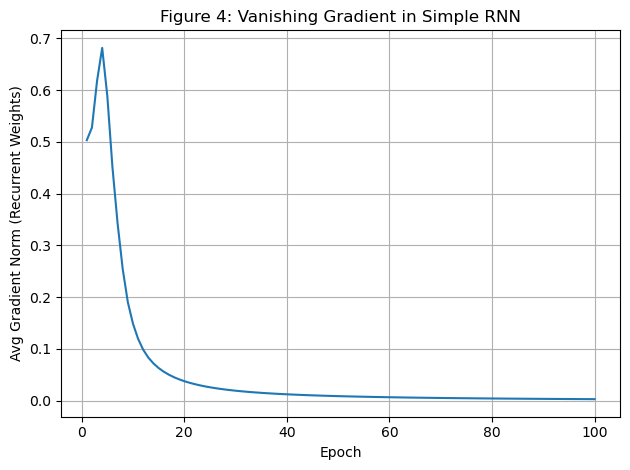

In [9]:
#ex4
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Sample toy dataset (character-level)
text = "hellohellohello"
chars = sorted(list(set(text)))
char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for i, ch in enumerate(chars)}

# Prepare sequence pairs
seq_length = 5
dataX, dataY = [], []
for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    dataX.append([char2idx[c] for c in seq_in])
    dataY.append(char2idx[seq_out])

X = torch.tensor(dataX)
y = torch.tensor(dataY)

# One-hot encoding function
def one_hot_encode(sequence, vocab_size):
    return torch.eye(vocab_size)[sequence]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # last time-step output
        return out, hidden

# Model parameters
vocab_size = len(chars)
hidden_size = 8
input_size = vocab_size
output_size = vocab_size
num_epochs = 100

model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Track average gradient norms over epochs
gradient_norms = []

for epoch in range(num_epochs):
    epoch_grads = []
    hidden = None

    for i in range(len(X)):
        input_seq = one_hot_encode(X[i], vocab_size).unsqueeze(0)  # shape: [1, seq_len, vocab_size]
        target = y[i].unsqueeze(0)  # shape: [1]

        # 🔧 Detach hidden state to avoid backprop through history
        output, hidden = model(input_seq, hidden.detach() if hidden is not None else None)
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()

        # Record gradient norm of recurrent weights
        for name, param in model.named_parameters():
            if 'weight_hh' in name:
                grad_norm = param.grad.norm().item()
                epoch_grads.append(grad_norm)

        optimizer.step()

    # Save average gradient for this epoch
    gradient_norms.append(sum(epoch_grads) / len(epoch_grads))

# Plot gradient norms
plt.plot(range(1, num_epochs + 1), gradient_norms)
plt.title("Figure 4: Vanishing Gradient in Simple RNN")
plt.xlabel("Epoch")
plt.ylabel("Avg Gradient Norm (Recurrent Weights)")
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1, Loss: 0.6942, Accuracy: 0.5020
Epoch 2, Loss: 0.6986, Accuracy: 0.5003
Epoch 3, Loss: 0.6987, Accuracy: 0.5055
Epoch 4, Loss: 0.6990, Accuracy: 0.5024
Epoch 5, Loss: 0.6982, Accuracy: 0.4990


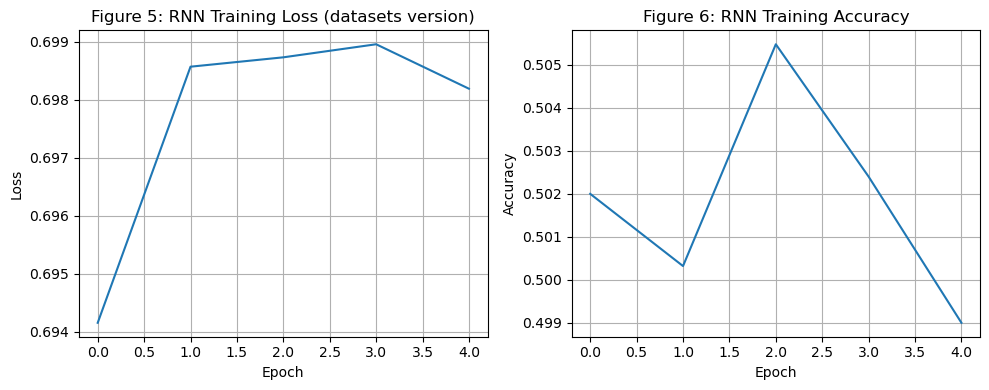

In [11]:
#ex5 new
import torch
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load IMDB dataset from Hugging Face
dataset = load_dataset("imdb")
train_data = dataset['train']
test_data = dataset['test']

# 2. Basic tokenizer
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.lower().split()

# 3. Build vocabulary from training set
counter = Counter()
for item in train_data:
    tokens = tokenize(item['text'])
    counter.update(tokens)

vocab = {word: idx+2 for idx, (word, _) in enumerate(counter.most_common(20000))}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1
pad_idx = vocab["<PAD>"]

def encode(text):
    return [vocab.get(word, vocab["<UNK>"]) for word in tokenize(text)]

# 4. Collate function
def collate_batch(batch):
    texts = [torch.tensor(encode(item['text']), dtype=torch.long) for item in batch]
    labels = [torch.tensor(1 if item['label'] == 1 else 0, dtype=torch.long) for item in batch]
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=pad_idx)
    return texts_padded.to(device), torch.stack(labels).to(device)

# 5. Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, collate_fn=collate_batch)

# 6. Define RNN model
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# 7. Initialize model
model = RNNClassifier(vocab_size=len(vocab), embed_dim=64, hidden_dim=128, output_dim=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. Train model
train_loss, train_acc = [], []

for epoch in range(5):  # Keep small for demo
    total_loss, correct, total = 0, 0, 0
    model.train()

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total
    train_loss.append(avg_loss)
    train_acc.append(accuracy)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# 9. Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Loss")
plt.title("Figure 5: RNN Training Loss (datasets version)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Accuracy")
plt.title("Figure 6: RNN Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


In [20]:
#ex6
import torch
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import re
from collections import Counter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load 500 training samples only
raw_data = load_dataset("imdb", split="train[:500]")

# Tokenizer and vocab
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.lower().split()

counter = Counter()
for item in raw_data:
    counter.update(tokenize(item['text']))

vocab = {word: i + 2 for i, (word, _) in enumerate(counter.most_common(5000))}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1
pad_idx = vocab["<PAD>"]

def encode(text):
    return [vocab.get(word, 1) for word in tokenize(text)]

# Collate function
def collate_batch(batch):
    texts = [torch.tensor(encode(item['text']), dtype=torch.long) for item in batch]
    labels = [torch.tensor(item['label'], dtype=torch.long) for item in batch]
    padded = pad_sequence(texts, batch_first=True, padding_value=pad_idx)
    return padded.to(device), torch.stack(labels).to(device)

loader = DataLoader(raw_data, batch_size=64, shuffle=True, collate_fn=collate_batch)

# Model definitions
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), 32, padding_idx=pad_idx)
        self.lstm = nn.LSTM(32, 32, batch_first=True)
        self.fc = nn.Linear(32, 2)

    def forward(self, x):
        x = self.embed(x)
        _, (h, _) = self.lstm(x)
        return self.fc(h.squeeze(0))

class GRUModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), 32, padding_idx=pad_idx)
        self.gru = nn.GRU(32, 32, batch_first=True)
        self.fc = nn.Linear(32, 2)

    def forward(self, x):
        x = self.embed(x)
        _, h = self.gru(x)
        return self.fc(h.squeeze(0))

# Training function (2 epochs)
def train_quick(model):
    model.to(device)
    optim_ = optim.Adam(model.parameters(), lr=0.005)
    loss_fn = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(2):
        total, correct, loss_sum = 0, 0, 0
        for x, y in loader:
            optim_.zero_grad()
            out = model(x)
            loss = loss_fn(out, y)
            loss.backward()
            optim_.step()
            loss_sum += loss.item()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        print(f"Epoch {epoch+1}: Loss={loss_sum/len(loader):.4f}, Accuracy={correct/total:.4f}")

print("\n LSTM Training (Fast Mode)")
train_quick(LSTMModel())

print("\n GRU Training (Fast Mode)")
train_quick(GRUModel())





 LSTM Training (Fast Mode)
Epoch 1: Loss=0.6712, Accuracy=0.4920
Epoch 2: Loss=0.1584, Accuracy=1.0000

 GRU Training (Fast Mode)
Epoch 1: Loss=0.4429, Accuracy=0.9980
Epoch 2: Loss=0.0453, Accuracy=1.0000


Epoch 1/30, Loss: 3.1766
Epoch 2/30, Loss: 2.3619
Epoch 3/30, Loss: 1.7181
Epoch 4/30, Loss: 1.1027
Epoch 5/30, Loss: 0.6221
Epoch 6/30, Loss: 0.3248
Epoch 7/30, Loss: 0.1391
Epoch 8/30, Loss: 0.0652
Epoch 9/30, Loss: 0.0645
Epoch 10/30, Loss: 0.0656
Epoch 11/30, Loss: 0.0226
Epoch 12/30, Loss: 0.0128
Epoch 13/30, Loss: 0.0100
Epoch 14/30, Loss: 0.0082
Epoch 15/30, Loss: 0.0069
Epoch 16/30, Loss: 0.0058
Epoch 17/30, Loss: 0.0050
Epoch 18/30, Loss: 0.0044
Epoch 19/30, Loss: 0.0038
Epoch 20/30, Loss: 0.0033
Epoch 21/30, Loss: 0.0029
Epoch 22/30, Loss: 0.0026
Epoch 23/30, Loss: 0.0023
Epoch 24/30, Loss: 0.0021
Epoch 25/30, Loss: 0.0018
Epoch 26/30, Loss: 0.0017
Epoch 27/30, Loss: 0.0015
Epoch 28/30, Loss: 0.0013
Epoch 29/30, Loss: 0.0012
Epoch 30/30, Loss: 0.0011

Figure 7: Generated Text from LSTM:
To be, or not to be, that is the slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them..ind to suffer
The slings and arrows of outrageous 

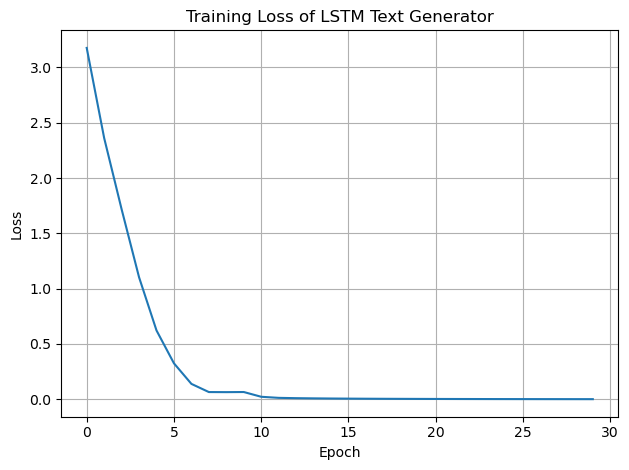

In [15]:
#ex7
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# Sample Shakespeare text
shakespeare_text = (
    "To be, or not to be, that is the question:\n"
    "Whether 'tis nobler in the mind to suffer\n"
    "The slings and arrows of outrageous fortune,\n"
    "Or to take arms against a sea of troubles\n"
    "And by opposing end them."
)

# Create character mapping
chars = sorted(set(shakespeare_text))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

# Encode full text
encoded = [char2idx[c] for c in shakespeare_text]

# Create sequences
seq_len = 40
X = []
y = []

for i in range(len(encoded) - seq_len):
    X.append(encoded[i:i+seq_len])
    y.append(encoded[i+seq_len])

X = torch.tensor(X)
y = torch.tensor(y)

# Define LSTM for character-level text generation
class CharLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out[:, -1, :])  # Last time-step
        return out, hidden

# Instantiate model
model = CharLSTM(vocab_size, embed_dim=64, hidden_dim=128)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Training loop
num_epochs = 30
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    model.train()

    for i in range(len(X)):
        input_seq = X[i].unsqueeze(0)  # shape: [1, seq_len]
        target = y[i].unsqueeze(0)     # shape: [1]

        optimizer.zero_grad()
        output, _ = model(input_seq)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(X)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

def generate_text(model, seed_text, gen_length=100):
    model.eval()
    input_seq = torch.tensor([char2idx[c] for c in seed_text], dtype=torch.long).unsqueeze(0)
    generated = list(seed_text)

    hidden = None
    for _ in range(gen_length):
        output, hidden = model(input_seq[:, -seq_len:], hidden)
        prob = torch.softmax(output, dim=1).squeeze()
        char_idx = torch.multinomial(prob, num_samples=1).item()
        generated_char = idx2char[char_idx]
        generated.append(generated_char)

        input_seq = torch.cat([input_seq, torch.tensor([[char_idx]])], dim=1)

    return ''.join(generated)


seed = "To be, or not to be, that is the "
print("\nFigure 7: Generated Text from LSTM:")
print(generate_text(model, seed_text=seed, gen_length=200))


plt.plot(losses)
plt.title("Training Loss of LSTM Text Generator")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
#ex8
import torch
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
import re
from collections import Counter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load a small sample (300 records)
data = load_dataset("imdb", split="train[:300]")

# 2. Tokenizer & vocab
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.lower().split()

counter = Counter()
for item in data:
    counter.update(tokenize(item["text"]))

vocab = {word: i + 2 for i, (word, _) in enumerate(counter.most_common(3000))}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1
pad_idx = vocab["<PAD>"]

def encode(text):
    return [vocab.get(tok, 1) for tok in tokenize(text)]

def collate_batch(batch):
    texts = [torch.tensor(encode(item['text']), dtype=torch.long) for item in batch]
    labels = [torch.tensor(item['label'], dtype=torch.long) for item in batch]
    texts = pad_sequence(texts, batch_first=True, padding_value=pad_idx)
    return texts.to(device), torch.stack(labels).to(device)

loader = DataLoader(data, batch_size=64, shuffle=True, collate_fn=collate_batch)

# 3. LSTM and BiLSTM model definitions
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), 32, padding_idx=pad_idx)
        self.lstm = nn.LSTM(32, 32, batch_first=True)
        self.fc = nn.Linear(32, 2)
    def forward(self, x):
        x = self.embed(x)
        _, (h, _) = self.lstm(x)
        return self.fc(h.squeeze(0))

class BiLSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), 32, padding_idx=pad_idx)
        self.lstm = nn.LSTM(32, 32, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(32 * 2, 2)
    def forward(self, x):
        x = self.embed(x)
        _, (h, _) = self.lstm(x)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)
        return self.fc(h_cat)

# 4. Training function (quick)
def train_quick(model):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.005)
    criterion = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(2):  # Only 2 epochs
        total, correct, loss_sum = 0, 0, 0
        for x, y in loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            loss_sum += loss.item()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        print(f"Epoch {epoch+1}: Loss={loss_sum/len(loader):.4f}, Accuracy={correct/total:.4f}")

# 5. Train both models
print("\n Training Standard LSTM (Fast Mode)")
train_quick(LSTMModel())

print("\n Training Bidirectional LSTM (Fast Mode)")
train_quick(BiLSTMModel())



 Training Standard LSTM (Fast Mode)
Epoch 1: Loss=0.6530, Accuracy=0.5767
Epoch 2: Loss=0.3495, Accuracy=1.0000

 Training Bidirectional LSTM (Fast Mode)
Epoch 1: Loss=0.5770, Accuracy=0.8000
Epoch 2: Loss=0.1913, Accuracy=1.0000
